In [276]:
import numpy as np
from scipy.optimize import minimize



In [277]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [278]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)


In [279]:
cos = np.cos
sin = np.sin

In [280]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

In [281]:
def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

In [282]:
def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [283]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand
    

In [284]:
def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand
    

In [285]:
def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand
    

In [286]:


def f_classical(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_classical_prime(a, b, c, d, t):
    return  3*a*t**2 + 2*b*t + c

def f_classical_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


n_grid = 50
range_min = 0
range_max = 0.2
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

print(t_data)


print('=======')
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 

def loss(params):
    a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = params


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f_classical(a1, b1, c1, d1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f_classical(a2, b2, c2, d2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f_classical(a3, b3, c3, d3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f_classical(a1, b1, c1, d1, t_data[i])
        u2[i + 1] = f_classical(a2, b2, c2, d2, t_data[i])
        u3[i + 1] = f_classical(a3, b3, c3, d3, t_data[i])


    u1[n_grid + 1]=f_classical(a1, b1, c1, d1, range_max + dt)  
    u2[n_grid + 1]=f_classical(a2, b2, c2, d2, range_max + dt)  
    u3[n_grid + 1]=f_classical(a3, b3, c3, d3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss



initial_params = [1, 2, 3,4,1,2,3,4,1,2,3,4]
# initial_params_f2 = [1, 2, 3,4]
# initial_params_f3 = [1, 2, 3,4]

# initial_params = [4, 4, 4,4]
# initial_params = [10, 20, 8,70]
# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = result.x


print("Optimized a:", a1)
print("Optimized b:", b1)
print("Optimized c:", c1)
print("Optimized d:", d1)

[0.         0.00408163 0.00816327 0.0122449  0.01632653 0.02040816
 0.0244898  0.02857143 0.03265306 0.03673469 0.04081633 0.04489796
 0.04897959 0.05306122 0.05714286 0.06122449 0.06530612 0.06938776
 0.07346939 0.07755102 0.08163265 0.08571429 0.08979592 0.09387755
 0.09795918 0.10204082 0.10612245 0.11020408 0.11428571 0.11836735
 0.12244898 0.12653061 0.13061224 0.13469388 0.13877551 0.14285714
 0.14693878 0.15102041 0.15510204 0.15918367 0.16326531 0.16734694
 0.17142857 0.1755102  0.17959184 0.18367347 0.1877551  0.19183673
 0.19591837 0.2       ]
Current loss: 1464604183519475.0
Current loss: 1448563035354196.8
Current loss: 1447436254427822.0
Current loss: 1441320279233101.8
Current loss: 1441096756269657.5
Current loss: 1441067166856421.2
Current loss: 1441017598335466.5
Current loss: 1441009905046976.0
Current loss: 1440999826788987.2
Current loss: 1440992923193520.0
Current loss: 1440980864437633.8
Current loss: 1440958524821627.2
Current loss: 624865897035612.1
Current loss

Current loss: 0.34197611211631307
Current loss: 0.09184582332600398
Current loss: 0.024774997911495292
Current loss: 0.020526650845506436
Current loss: 0.020239125778059256
Current loss: 0.020218578302754198
Current loss: 0.020217724542841743
Current loss: 0.020217717220220335
Current loss: 0.02021771719841151
Current loss: 0.02021771295823071
Current loss: 0.020217710311433608
Optimized a: 0.00033297616345071294
Optimized b: -0.011638789726021635
Optimized c: 0.07952338205854771
Optimized d: 0.06259998808423277


In [287]:
# del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
# omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

# del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
# omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

# del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
# omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]

In [288]:
del1_target_values=[0.0626, 0.06269815373024408, 0.06291775472374621, 0.06319347532735119, 0.0634950392127472, 0.06380835617505363, 0.0641269393637796, 0.0644477407665352, 0.06476937978572594, 0.06509118749864412, 0.0654128694896339, 0.06573428468470385, 0.06605537294383554, 0.06637609827378772, 0.06669644693237298, 0.0670164162038493, 0.06733600113234839, 0.06765520096794765, 0.06797401513924943, 0.06829244328064567, 0.06861048523231798, 0.06892814104023764, 0.06924541095616549, 0.06956229531543184, 0.06987879401999923, 0.07019490717577911, 0.07051063491761103, 0.07082597738131209, 0.07114093470367688, 0.07145550702247748, 0.0717696944764635, 0.07208349720536204, 0.07239691534987772, 0.07270994905169265, 0.07302259845346643, 0.07333486369883623, 0.07364674493241666, 0.07395824229979985, 0.07426935594755546, 0.07458008602323062, 0.07489043267534999, 0.07520039605341576, 0.07550997631532771, 0.07581917366007691, 0.0761279881947374, 0.07643642008183966, 0.0767444694851897, 0.07705213656986916, 0.07735942150223522, 0.07766632444992065]
omega1_target_values=[1.0, 1.0001131932563407, 1.0001655634580253, 1.0001897238200885, 1.0002007890640574, 1.0002057934003088, 1.000207975260212, 1.000208856328613, 1.0002091258788053, 1.0002091179012593, 1.0002089794260889, 1.0002087809325648, 1.0002085524969846, 1.0002083121421164, 1.000208066783592, 1.0002078178333185, 1.0002075678222946, 1.0002073171827897, 1.0002070662588183, 1.0002068152925283, 1.0002065644242002, 1.0002063136922492, 1.0002060630332228, 1.0002058123429576, 1.0002055617340946, 1.0002053112184308, 1.0002050607943858, 1.0002048104606913, 1.0002045602163903, 1.0002043100608364, 1.0002040599936957, 1.000203810014944, 1.0002035601248696, 1.0002033103240717, 1.000203060613461, 1.0002028109942591, 1.0002025614679992, 1.0002023120365255, 1.0002020627019939, 1.000201813466871, 1.0002015643339355, 1.0002013153062768, 1.0002010663851861, 1.0002008175572803, 1.000200568835946, 1.0002003202217271, 1.000200071715182, 1.0001998233168865, 1.000199575027432, 1.0001993268474256]

del2_target_values=[1.0567, 1.0565514454860674, 1.0562189882740862, 1.0558013437413982, 1.055344209199507, 1.0548688277538047, 1.0543849687565323, 1.0538972183247777, 1.0534076522986509, 1.0529172764346488, 1.0524265338758625, 1.0519356378047149, 1.0514446801294322, 1.0509537166264065, 1.0504627697803763, 1.0499718455977314, 1.0494809534652578, 1.0489900964815217, 1.0484992774776667, 1.0480084989764202, 1.0475177631920949, 1.0470270720305888, 1.0465364270893849, 1.0460458298378468, 1.0455552823884326, 1.0450647865477294, 1.0445743440745094, 1.0440839567230318, 1.0435936262430405, 1.0431033543797665, 1.042613142873926, 1.0421229934617215, 1.0416329078748419, 1.041142887840461, 1.0406529350812395, 1.0401630513153237, 1.039673238256346, 1.0391834976134247, 1.0386938310911642, 1.0382042403896545, 1.0377147272044722, 1.0372252932266792, 1.0367359401265777, 1.0362466694854462, 1.0357574830864842, 1.0352683825879587, 1.0347793696428387, 1.0342904458987945, 1.033801612998199, 1.0333128725781264]
omega2_target_values=[1.0, 0.9998286701081165, 0.9997492952725983, 0.9997125200232465, 0.9996954971844055, 0.999687606372928, 0.9996839639494389, 0.9996822778307224, 0.9996815110458159, 0.9996811616527267, 0.9996810090071284, 0.9996809474413461, 0.9996809319212003, 0.9996809354752185, 0.9996809477745401, 0.999680966726635, 0.9996809885462578, 0.999681012589331, 0.9996810383427006, 0.9996810654446319, 0.9996810936848085, 0.9996811230043339, 0.99968115349573, 0.9996811853124581, 0.9996812182843616, 0.9996812523914544, 0.9996812876343868, 0.9996813240133007, 0.9996813615278302, 0.9996814001771006, 0.9996814399597294, 0.9996814808738258, 0.999681522916991, 0.9996815660863172, 0.9996816103783893, 0.9996816557892834, 0.9996817023145674, 0.9996817499493014, 0.9996817986880366, 0.9996818485248168, 0.9996818994531768, 0.9996819514661436, 0.999682004560409, 0.9996820587593589, 0.9996821140333089, 0.9996821703796024, 0.999682227795541, 0.9996822862783835, 0.9996823458253469, 0.9996824064336052]

del3_target_values=[0.9449, 0.9446157005648396, 0.9439797528406668, 0.9431815783658597, 0.9423090331134079, 0.9414030350197233, 0.9404824357668412, 0.9395560990591906, 0.9386280418303156, 0.9377002106101858, 0.93677346176297, 0.9358482047578094, 0.9349246130476112, 0.9340027896086304, 0.9330827724702047, 0.9321645674429477, 0.931248186846876, 0.9303336306870681, 0.9294208984474527, 0.928509989012294, 0.9276009006661909, 0.9266936310940772, 0.9257881773812217, 0.9248845363468373, 0.9239827061092049, 0.9230826841901647, 0.9221844679963813, 0.9212880549332607, 0.9203934424049504, 0.919500627814339, 0.9186096085630567, 0.9177203820514748, 0.9168329456787064, 0.9159472968426057, 0.9150634329397683, 0.9141813513655314, 0.9133010495139731, 0.9124225247779132, 0.9115457745489131, 0.9106707962172748, 0.9097975871720426, 0.9089261448010018, 0.9080564664439266, 0.9071885492025715, 0.9063223907627749, 0.905457988455646, 0.904595339610202, 0.9037344415533689, 0.9028752916099813, 0.9020178871027813]
omega3_target_values=[1.0, 0.9996721559835177, 0.9995206123838869, 0.9994509006840302, 0.9994192047539774, 0.9994051171525665, 0.9993992351693664, 0.9993971371900485, 0.9993968187268679, 0.9993973078099279, 0.9993981761310268, 0.9993992182484669, 0.9994003464185734, 0.9994015080404197, 0.9994026828980823, 0.9994038668400863, 0.9994050524665968, 0.9994062385158505, 0.9994074239832871, 0.9994086081607084, 0.9994097906362788, 0.999410971294525, 0.9994121503163363, 0.9994133280115826, 0.9994145040425914, 0.9994156783656327, 0.9994168509902922, 0.9994180219246047, 0.9994191911750558, 0.9994203587465813, 0.9994215246425664, 0.9994226888648473, 0.9994238514137096, 0.9994250122878896, 0.9994261714845734, 0.999427328999397, 0.9994284848264471, 0.9994296389582602, 0.9994307913858229, 0.9994319420985718, 0.999433091084394, 0.9994342383296264, 0.999435383831043, 0.9994365276662281, 0.9994376697606014, 0.9994388101144396, 0.9994399487279256, 0.999441085601149, 0.9994422207341054, 0.9994433541266963]

print(len(del2_target_values))

50


Text(0.5, 1.0, 'Fitting Data')

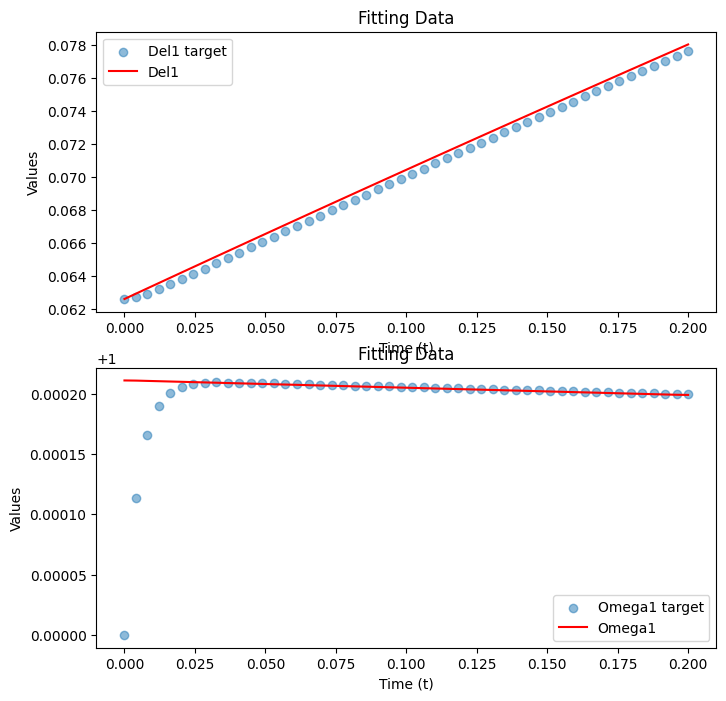

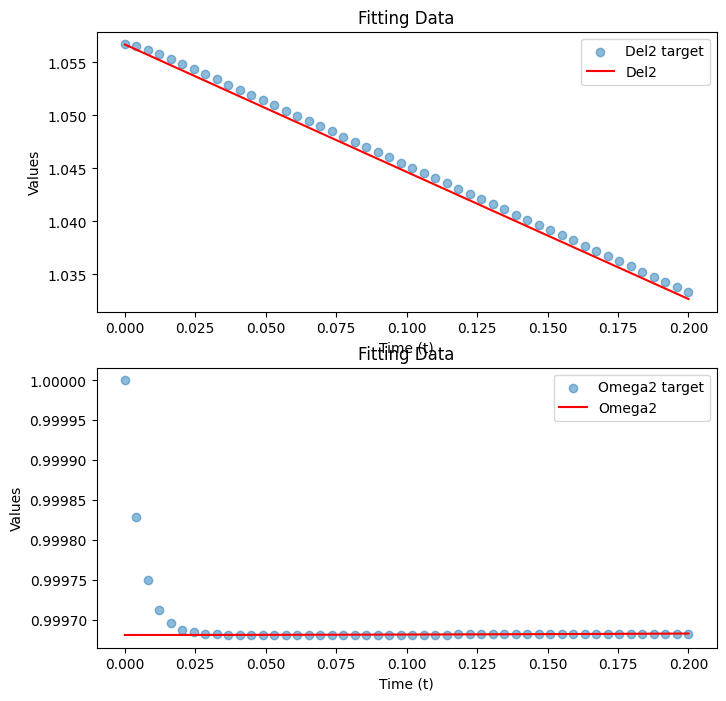

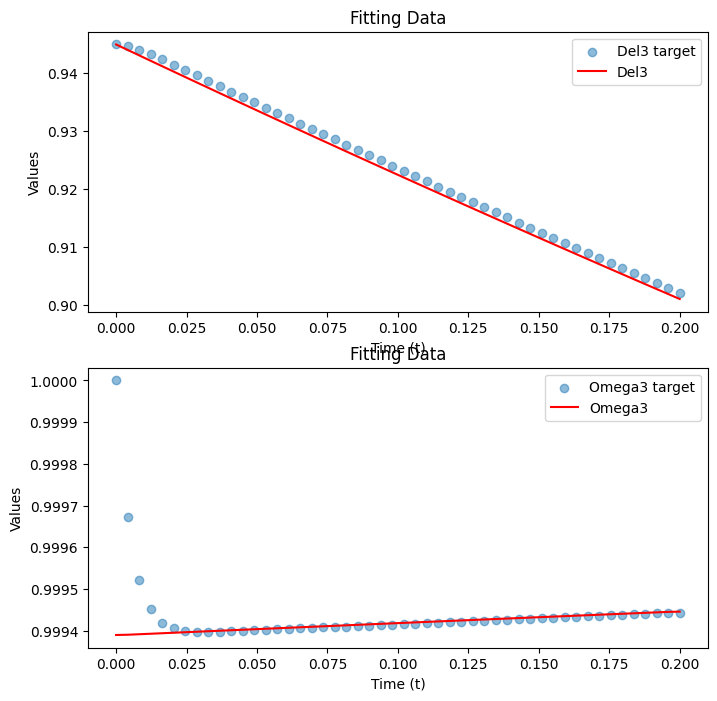

In [289]:
import matplotlib.pyplot as plt


# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delt1_pred = f_classical(a1, b1, c1, d1,t_data)
plt.plot(t_data, delt1_pred, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delt1_prime = np.gradient(delt1_pred, t_data)
fitted_values = (1/Ws)*delt1_prime+1
# fitted_values = (1/Ws)*f_classical_prime(a1,b1,c1,d1,t_data)+1
plt.plot(t_data, fitted_values, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delt2_pred = f_classical(a2, b2, c2, d2,t_data)
plt.plot(t_data, delt2_pred, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delt2_prime = np.gradient(delt2_pred, t_data)
fitted_values = (1/Ws)*delt2_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delt3_pred = f_classical(a3, b3, c3, d3,t_data)
plt.plot(t_data, delt3_pred, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delt3_prime = np.gradient(delt3_pred, t_data)
fitted_values = (1/Ws)*delt3_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')